In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

In [106]:
df = pd.read_csv('netflix_titles.csv')
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [107]:
netflix_shows = df[df['type']=='TV Show']
netflix_movies = df[df['type'] == 'Movie']

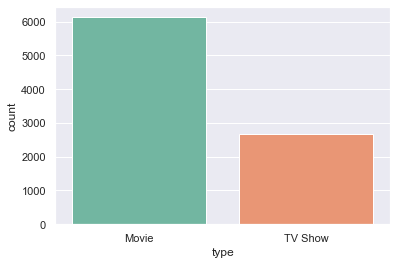

In [108]:
sns.set(style="darkgrid")
ax = sns.countplot(x='type', data=df, palette="Set2")

In [109]:
netflix_date = df[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [110]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [111]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September
...,...,...,...
8795,"May 1, 2018",2018,May
8796,"January 17, 2017",2017,January
8797,"September 13, 2018",2018,September
8800,"December 15, 2016",2016,December


In [112]:
netflix_date

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September
...,...,...,...
8795,"May 1, 2018",2018,May
8796,"January 17, 2017",2017,January
8797,"September 13, 2018",2018,September
8800,"December 15, 2016",2016,December


In [113]:
year_group = netflix_date.groupby('year')['month'].value_counts().unstack()
year_group

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,1.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,2.00,1.00
2014,1.00,NaN,1.00,1.00,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN
2015,4.00,NaN,7.00,1.00,NaN,2.00,2.00,2.00,1.00,2.00,4.00,1.00
2016,8.00,11.00,44.00,6.00,28.00,9.00,7.00,3.00,4.00,18.00,19.00,19.00
2017,27.00,38.00,38.00,17.00,14.00,34.00,29.00,38.00,23.00,30.00,29.00,32.00
2018,28.00,34.00,61.00,24.00,24.00,27.00,28.00,35.00,27.00,36.00,45.00,43.00
2019,43.00,44.00,47.00,45.00,37.00,59.00,46.00,53.00,48.00,68.00,65.00,37.00
2020,50.00,47.00,68.00,42.00,53.00,43.00,41.00,44.00,52.00,51.00,51.00,53.00


In [114]:
year_group = year_group.fillna(0)
year_group

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2008,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2013,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,1.00
2014,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
2015,4.00,0.00,7.00,1.00,0.00,2.00,2.00,2.00,1.00,2.00,4.00,1.00
2016,8.00,11.00,44.00,6.00,28.00,9.00,7.00,3.00,4.00,18.00,19.00,19.00
2017,27.00,38.00,38.00,17.00,14.00,34.00,29.00,38.00,23.00,30.00,29.00,32.00
2018,28.00,34.00,61.00,24.00,24.00,27.00,28.00,35.00,27.00,36.00,45.00,43.00
2019,43.00,44.00,47.00,45.00,37.00,59.00,46.00,53.00,48.00,68.00,65.00,37.00
2020,50.00,47.00,68.00,42.00,53.00,43.00,41.00,44.00,52.00,51.00,51.00,53.00


In [115]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
year_group = year_group[month_order]
year_group


month,December,November,October,September,August,July,June,May,April,March,February,January
year,,,,,,,,,,,,
2008,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2013,0.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2014,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2015,7.00,2.00,4.00,1.00,0.00,2.00,2.00,1.00,4.00,2.00,1.00,0.00
2016,44.00,18.00,19.00,19.00,11.00,9.00,7.00,4.00,8.00,3.00,6.00,28.00
2017,38.00,30.00,29.00,32.00,38.00,34.00,29.00,23.00,27.00,38.00,17.00,14.00
2018,61.00,36.00,45.00,43.00,34.00,27.00,28.00,27.00,28.00,35.00,24.00,24.00
2019,47.00,68.00,65.00,37.00,44.00,59.00,46.00,48.00,43.00,53.00,45.00,37.00
2020,68.00,51.00,51.00,53.00,47.00,43.00,41.00,52.00,50.00,44.00,42.00,53.00


C:\Users\kshit\AppData\Local\Temp/ipykernel_8216/1662288087.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolor(year_group, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
C:\Users\kshit\AppData\Local\Temp/ipykernel_8216/1662288087.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


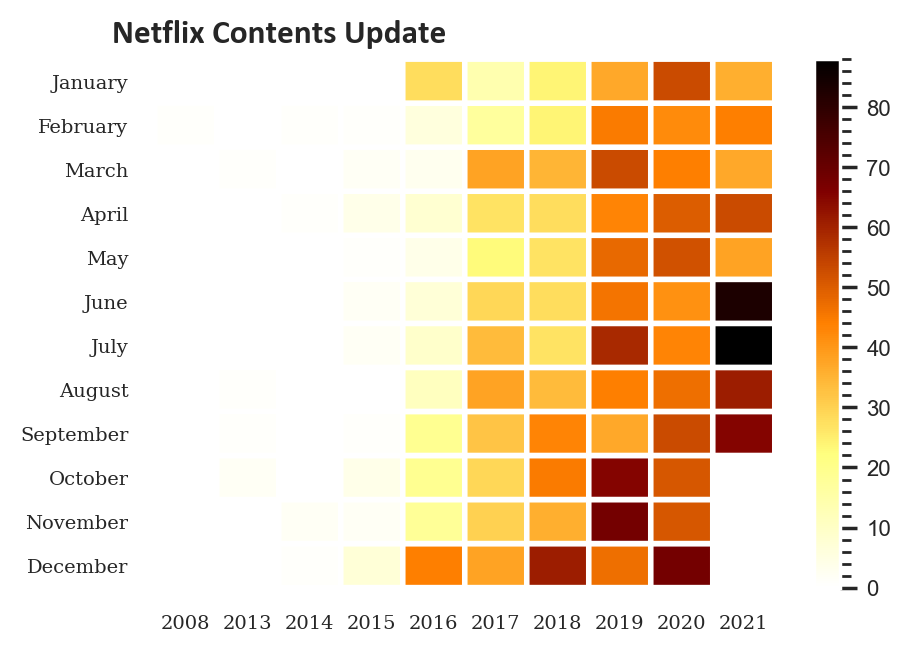

In [123]:
plt.figure(figsize=(5, 3.5), dpi=200)
plt.pcolor(year_group, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(year_group.columns), 1), year_group.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(year_group.index), 1), year_group.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [117]:
year_group = year_group.T